# Environment set-up

In [1]:
import os

In [2]:
ROOT_FOLDER =     '/media/beegfs/home/x002/PROJECT'
DATASETS_FOLDER = '/media/beegfs/home/x002/PROJECT/Datasets'
DUMP_FOLDER =     '/media/beegfs/home/x002/PROJECT/dump'
MODELS_FOLDER = '/media/beegfs/home/x002/SCRATCH/models'


HUBERT_superb_large="superb/hubert-large-superb-er"
RANDOM_SEED=1973

## Common cells

In [3]:
print(os.getcwd())

/media/beegfs/home/x002/PROJECT


In [4]:

try:
  os.chdir(MODELS_FOLDER)
except:
  print(os.getcwd())
else:
  print(os.getcwd())

/media/beegfs/home/x002/SCRATCH/models


In [6]:
from IndependentSER_common_code import *

ModuleNotFoundError: No module named 'IndependentSER_common_code'

In [67]:

import os
ROOT_FOLDER =   '/home/x002/PROJECT'
DATASETS_FOLDER = ROOT_FOLDER+'/Datasets/'
DFs_FOLDER =     ROOT_FOLDER+'/DFs/'
DUMP_FOLDER = ROOT_FOLDER+'/dump/'

import gc
import datetime
import fnmatch
import numpy as np
import pandas as pd
import random
import pickle
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
from pandas.core.frame import DataFrame
import seaborn as sns

#from IPython.display import Audio
import librosa
import librosa.display

import torch
from torch.optim import AdamW
from torch.utils.data import DataLoader
from datasets import Dataset
from transformers import Wav2Vec2FeatureExtractor
from transformers import HubertForSequenceClassification
from sklearn.metrics import accuracy_score
from transformers import AutoFeatureExtractor, AutoModelForAudioClassification

os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"
if torch.cuda.is_available():
  DEVICE = torch.device("cuda")
  DEVICE_name = torch.cuda.get_device_name(DEVICE)
else:
  DEVICE = torch.device("cpu")
  DEVICE_name = "cpu"

print("We are using the DEVICE %s - %s" % (DEVICE, DEVICE_name))

from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))



"""#Trainings

##Settings
"""

############## script ######################################################################

labeldict = ({'neutral':0, 'happy':1, 'sad':2, 'angry':3, 'fear':4, 'disgust':5, 'surprise':6})

label2id, id2label = dict(), dict()
for emotion in labeldict:
    label2id[emotion] = str(labeldict[emotion])
    id2label[str(labeldict[emotion])] = emotion

num_labels = len(id2label)

os.chdir(DFs_FOLDER)

DATASET_n = 'D.CAFE_'
TEST_DF = DATASET_n + 'test_DF.p'
TRAIN_DF = DATASET_n + 'train_DF.p'
CAFE_train_df = pickle.load(open(TRAIN_DF, 'rb'))
CAFE_test_df = pickle.load(open(TEST_DF, 'rb'))
CAFE_df = pd.concat([CAFE_train_df,CAFE_test_df])
CAFE_df.reset_index(inplace=True,drop=True)

DATASET_n = 'D.CREMA_'
TEST_DF = DATASET_n + 'test_DF.p'
TRAIN_DF = DATASET_n + 'train_DF.p'
CREMA_train_df = pickle.load(open(TRAIN_DF, 'rb'))
CREMA_test_df = pickle.load(open(TEST_DF, 'rb'))
CREMA_df = pd.concat([CREMA_train_df,CREMA_test_df])
CREMA_df.reset_index(inplace=True,drop=True)

DATASET_n = 'D.EMOFILM_'
TEST_DF = DATASET_n + 'test_DF.p'
TRAIN_DF = DATASET_n + 'train_DF.p'
EMOFILM_train_df = pickle.load(open(TRAIN_DF, 'rb'))
EMOFILM_test_df = pickle.load(open(TEST_DF, 'rb'))
EMOFILM_df = pd.concat([EMOFILM_train_df,EMOFILM_test_df])
EMOFILM_df.reset_index(inplace=True,drop=True)

DATASET_n = 'D.RAVDESS_'
TEST_DF = DATASET_n + 'test_DF.p'
TRAIN_DF = DATASET_n + 'train_DF.p'
RAVDESS_train_df = pickle.load(open(TRAIN_DF, 'rb'))
RAVDESS_test_df = pickle.load(open(TEST_DF, 'rb'))
RAVDESS_train_df = RAVDESS_train_df.drop('gender',axis=1)
RAVDESS_train_df = RAVDESS_train_df.replace({'calm':'neutral'})  # ¿mejor drop calm
RAVDESS_train_df = RAVDESS_train_df.replace({7:0})
RAVDESS_test_df = RAVDESS_test_df.drop('gender',axis=1)
RAVDESS_test_df = RAVDESS_test_df.replace({'calm':'neutral'})  # ¿mejor drop calm
RAVDESS_test_df = RAVDESS_test_df.replace({7:0})
RAVDESS_df = pd.concat([RAVDESS_train_df,RAVDESS_test_df])
RAVDESS_df.reset_index(inplace=True,drop=True)

DATASET_n = 'D.SAVEE_'
TEST_DF = DATASET_n + 'test_DF.p'
TRAIN_DF = DATASET_n + 'train_DF.p'
SAVEE_train_df = pickle.load(open(TRAIN_DF, 'rb'))
SAVEE_test_df = pickle.load(open(TEST_DF, 'rb'))
SAVEE_df = pd.concat([SAVEE_train_df,SAVEE_test_df])
SAVEE_df.reset_index(inplace=True,drop=True)

DATASET_n = 'D.TESS_'
TEST_DF = DATASET_n + 'test_DF.p'
TRAIN_DF = DATASET_n + 'train_DF.p'
TESS_train_df = pickle.load(open(TRAIN_DF, 'rb'))
TESS_test_df = pickle.load(open(TEST_DF, 'rb'))
TESS_df = pd.concat([TESS_train_df,TESS_test_df])
TESS_df.reset_index(inplace=True,drop=True)

torch.set_warn_always = False

classes = np.unique(RAVDESS_df['labels'].values)

classes_names = np.unique(RAVDESS_df['emotions'].values)

values = [RAVDESS_df['emotions'].values.tolist().count(class_) for class_ in classes_names] # frequency


ModuleNotFoundError: No module named 'IndependentSER_common_code'

## Enable some common libraries and constants

In [51]:
#!pip install transformers
#!pip install datasets -q -qq

In [52]:
import fnmatch

import numpy as np
import pandas as pd
import random
import pickle
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
from pandas.core.frame import DataFrame
import seaborn as sns
#plt.style.use('seaborn-white')

from IPython.display import Audio
import librosa
import librosa.display

import torch
from torch.optim import AdamW
from torch.utils.data import DataLoader
from datasets import Dataset
#from torch.utils.data import Dataset
from transformers import Wav2Vec2FeatureExtractor
from transformers import HubertForSequenceClassification
#from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Common functions and definitions

In [53]:
def data_distribution(df):
    classes = np.unique(df['labels'].values)
    classes_names = np.unique(df['emotions'].values)
    values = [df['labels'].values.tolist().count(class_) for class_ in classes] # frequency
    plt.figure( figsize=(5 , 3)  , dpi=100 )
    plt.bar(classes , values)
    plt.xticks(classes, classes_names , size=10)
    plt.xlabel('Class', size=12)
    plt.ylabel('Frequency', size=12)
    plt.title('Class Distribution of Dataset', size=13)
    plt.show()

In [54]:
class EmotionDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item#,# torch.tensor(self.labels[idx])

    def __len__(self):
        return len(self.labels)

# Prediction function
def predict(outputs):
    probabilities = torch.softmax(outputs["logits"], dim=1)
    predictions = torch.argmax(probabilities, dim=1)
    return predictions

def plot_loss_acc(train_loss, train_accuracies):

  # Plot Iteration vs Training Loss
  plt.plot(train_loss, label="Training Loss")
  plt.xlabel("Iteration")
  plt.ylabel("Loss")
  plt.title("Iteration vs Training Loss")
  plt.legend()
  plt.show()

  # Plot Epoch vs Training Accuracy
  acc_X = np.arange(len(train_accuracies))+1
  plt.plot(acc_X, train_accuracies,"-", label="Training Accuracy")
  plt.xticks(acc_X)
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")
  plt.title("Epoch vs Training Accuracy")
  plt.legend()
  plt.show()


def data_split(dataset, name_dump ,frac=0.2):
  test_df = dataset.groupby("emotions").sample(frac=frac,random_state=RANDOM_SEED)
  train_df = dataset.drop(test_df.index)
  os.chdir(DUMP_FOLDER)
  pickle.dump(test_df,  open(name_dump, 'wb'))
  os.chdir(DATASETS_FOLDER)
  return train_df, test_df


def extractor_hubrert_single(df):
  def map_to_array(example):
    speech, _ = librosa.load(example["path"], sr=16000, mono=True)
    example["speech"] = speech
    return example
  os.chdir(DATASETS_FOLDER)
  data = Dataset.from_pandas(df).map(map_to_array)
  feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained("superb/hubert-large-superb-er", token=HF_TOKEN)
  encodings = feature_extractor(list(data["speech"]), sampling_rate=16000, padding=True, return_tensors="pt")
  return encodings

def extractor_hubert(train_df, test_df, pretrained=HUBERT_superb_large):
#def extractor_hubert_single(train_df, pretrained=HUBERT_superb_large):
  def map_to_array(example):
    speech, _ = librosa.load(example["path"], sr=16000, mono=True)
    example["speech"] = speech
    return example
  os.chdir(DATASETS_FOLDER)
  train_data = Dataset.from_pandas(train_df).map(map_to_array)
  test_data = Dataset.from_pandas(test_df).map(map_to_array)
  feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained(pretrained, token=HF_TOKEN)
  print("Getting encodings...")
  train_encodings = feature_extractor(list(train_data["speech"]), sampling_rate=16000, padding=True, return_tensors="pt")
  test_encodings = feature_extractor(list(test_data["speech"]), sampling_rate=16000, padding=True, return_tensors="pt")
  os.chdir(DATASETS_FOLDER)
  del feature_extractor
  return train_encodings, test_encodings


def train_the_model(model, model_name, optim, train_dataset, test_dataset,
                    epoch_ini=1,
                    epochs=3,
                    batch_size=2,
                    dump_folder = DUMP_FOLDER,
                    train_loss = list(),
                    train_accuracies = list()):
  best_acc = 0
  # Enable training
  model.train()
  epoch_ini=epoch_ini-1
  for epoch_i in range(epochs):
    print('Epoch %s/%s' % (epoch_i + 1 + epoch_ini, epochs+epoch_ini))
    time.sleep(0.3)

    # Get training data by DataLoader
    train_loader = DataLoader(train_dataset,
                              batch_size,
                              shuffle=True)
    correct = 0
    count = 0
    epoch_loss = list()

    pbar = tqdm(train_loader)
    for batch in pbar:
      optim.zero_grad()
      input_ids = batch['input_values'].to(device)
      attention_mask = batch['attention_mask'].to(device)
      labels = batch['labels'].to(device)
      outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
      loss = outputs['loss']
      loss.backward()
      optim.step()

      # make predictions
      predictions = predict(outputs)

      # count accuracy
      correct += predictions.eq(labels).sum().item()
      count += len(labels)
      accuracy = correct * 1.0 / count

      # show progress along with metrics
      pbar.set_postfix({
          'Loss': '{:.3f}'.format(loss.item()),
          'Accuracy': '{:.3f}'.format(accuracy)
      })
      # record the loss for each batch
      epoch_loss.append(loss.item())
    # record the loss and accuracy for each epoch
    train_loss += epoch_loss
    train_accuracies.append(accuracy)
    # Save checkpoint
    val_acc = testing(test_dataset, model, verbose=False)
    if val_acc > best_acc:
      best_acc = val_acc
      #tmp_name = model_name[:-2]+"_Best_Epcoh"+".p"
      tmp_name = model_name
      print("Guardando epoch: ",epoch_i+1+epoch_ini)
      save_checkpoint(epoch_i+epoch_ini, model, optim, train_loss, train_accuracies, tmp_name)
    else:
      tmp_name = model_name
    #save_checkpoint(epoch_i+epoch_ini, model, optim, train_loss, train_accuracies, tmp_name)
    pbar.close()
  return train_loss, train_accuracies

# model, epoch, optim,  train_loss, train_accuracies = load_checkpoint(device_name ,model, optim, model_name, dump_folder=DUMP_FOLDER):
def load_checkpoint(device_name, model, optim, model_name, dump_folder=DUMP_FOLDER):
  #load the model
  os.chdir(dump_folder)
  if device_name == 'cpu':
    checkpoint = torch.load(model_name, map_location=torch.device('cpu'))
  else:
    checkpoint = torch.load(model_name)
  epoch = checkpoint['epoch']
  model.load_state_dict(checkpoint['model_state_dict'])
  optim.load_state_dict(checkpoint['optimizer_state_dict'])
  #loss = checkpoint['loss']
  train_loss = checkpoint['train_loss']
  train_accuracies = checkpoint['train_accuracies']
  #return model, epoch, optim, loss, train_loss, train_accuracies
  os.chdir(DATASETS_FOLDER)
  return model, epoch, optim, train_loss, train_accuracies

#save_checkpoint(epoch_i, model, optim,  train_loss, train_accuracies, model_name, dump_folder=DUMP_FOLDER)
def save_checkpoint(epoch_i, model, optim, train_loss, train_accuracies, model_name, dump_folder=DUMP_FOLDER):
 # Save checkpoint
    os.chdir(dump_folder)
    torch.save({
      'epoch': epoch_i,
      'model_state_dict': model.state_dict(),
      'optimizer_state_dict': optim.state_dict(),
      #'loss': loss,
      'train_loss':train_loss,
      'train_accuracies':train_accuracies
      }, model_name)
    os.chdir(DATASETS_FOLDER)

def testing(test_dataset, model, verbose = True):
  # Get test data by DataLoader
  test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)
  # Start testing
  model.eval()
  with torch.no_grad():
      correct = 0
      count = 0
      record = {"labels":list(), "predictions":list()}
      if verbose:
        pbar = tqdm(test_loader)
      else:
        pbar = test_loader
      for batch in pbar:
          input_ids = batch['input_values'].to(device)
          attention_mask = batch['attention_mask'].to(device)
          labels = batch['labels'].to(device)
          outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
          loss = outputs['loss']

          # make predictions
          predictions = predict(outputs)
          # count accuracy
          correct += predictions.eq(labels).sum().item()
          count += len(labels)
          accuracy = correct * 1.0 / count
          # show progress along with metrics
          if verbose:
            pbar.set_postfix({
              'loss': '{:.3f}'.format(loss.item()),
              'accuracy': '{:.3f}'.format(accuracy)
            })
          # record the results
          record["labels"] += labels.cpu().numpy().tolist()
          record["predictions"] += predictions.cpu().numpy().tolist()
      if verbose:
        pbar.close()
  #time.sleep(0.3)
  if verbose:
    print("The final accuracy on the test dataset: %s%%" % round(accuracy*100,4))
    return record
  else:
    model.train()
    return accuracy

def incorrect_ones2(record,test_df):
  def get_emotions(labels_id):
    return model.config.id2label[labels_id]
  # Convert test record to a pandas DataFrame object
  df_record = DataFrame(record)
  df_record.columns = ["Ground Truth","Model Prediction"]
  df_record["Ground Truth"] = df_record.apply(lambda x: get_emotions(x["Ground Truth"]), axis=1)
  df_record["Model Prediction"] = df_record.apply(lambda x: get_emotions(x["Model Prediction"]), axis=1)

  # Concat test texts and test records
  df = pd.concat([test_df.reset_index(), df_record["Model Prediction"]], axis=1)
  df["emotions"] = df.apply(lambda x: x["emotions"][:3], axis=1)

  # Show test result
  pd.set_option('display.max_rows', None)    # Display all rows
  # df

  # Show incorrect predictions
  print(df[df["emotions"]!=df["Model Prediction"]])
  return df_record



In [55]:
def incorrect_ones(record,test_df):
  # Convert test record to a pandas DataFrame object
  df_record = DataFrame(record)
  df_record.columns = ["Ground Truth","Model Prediction"]

  # Concat test texts and test records
  df = pd.concat([test_df.reset_index(), df_record["Model Prediction"]], axis=1)
  df["emotions"] = df.apply(lambda x: x["emotions"][:3], axis=1)

  # Show test result
  pd.set_option('display.max_rows', None)    # Display all rows
  # df

  # Show incorrect predictions
  incorrect = df[df["labels"]!=df["Model Prediction"]]

  print(incorrect[["emotions","labels","Model Prediction"]])
  return df_record

In [56]:
def display_confusion_matrix(df_record):
  # Display the Confusion Matrix
  print("Confusion matrix of the result: ")
  crosstab = pd.crosstab(df_record["Ground Truth"],df_record["Model Prediction"])
  sns.heatmap(crosstab, cmap='Oranges', annot=True, fmt='g', linewidths=5)
  accuracy = df_record["Ground Truth"].eq(df_record["Model Prediction"]).sum() / len(df_record["Ground Truth"])
  plt.title("Confusion Matrix (Accuracy: %s%%)" % round(accuracy*100,2))
  plt.show()

## Load and preprocess Datasets

In [57]:
# => Kaggle_datasets_loading.ipynb

"""
#Download and unzip Dataset. Source  https://zenodo.org/record/1188976
if DATA_PROCESSING:
  ![ -f Audio_Speech_Actors_01-24.zip ] && echo "File existed" || wget "https://zenodo.org/record/1188976/files/Audio_Speech_Actors_01-24.zip?download=1" -O Audio_Speech_Actors_01-24.zip
  ![ -f "./Audio_Speech_Actors_01-24/Actor_01/03-01-01-01-01-01-01.wav" ] && echo "File existed" || unzip -q Audio_Speech_Actors_01-24.zip -d "./Audio_Speech_Actors_01-24/"
"""

'\n#Download and unzip Dataset. Source  https://zenodo.org/record/1188976\nif DATA_PROCESSING:\n  ![ -f Audio_Speech_Actors_01-24.zip ] && echo "File existed" || wget "https://zenodo.org/record/1188976/files/Audio_Speech_Actors_01-24.zip?download=1" -O Audio_Speech_Actors_01-24.zip\n  ![ -f "./Audio_Speech_Actors_01-24/Actor_01/03-01-01-01-01-01-01.wav" ] && echo "File existed" || unzip -q Audio_Speech_Actors_01-24.zip -d "./Audio_Speech_Actors_01-24/"\n'

In [58]:
TESS =  "./TESS Toronto emotional speech set data/"
RAV =   "./ravdess-emotional-speech-audio/audio_speech_actors_01-24/"
SAVEE = "./surrey-audiovisual-expressed-emotion-savee/ALL/"
CREMA = "./cremad/AudioWAV/"
SHEMO = "./ShEMO/"
EMOFILM =   "./EMOFilm/"

In [59]:
# EMOFILM -----------------------------------------------------------------------
os.chdir(DATASETS_FOLDER)
dir_list = os.listdir(EMOFILM)
#dir_list = os.listdir()
emotions=[]
path = []
dataset_size = 0
for i in dir_list:
    if i[2:5]=='rab':
        emotions.append('angry')
    elif i[2:5]=='dis':
        emotions.append('disgust')
    elif i[2:5]=='ans':
        emotions.append('fear')
    elif i[2:5]=='gio':
        emotions.append('happy')
    elif i[2:5]=='tri':
        emotions.append('sad')
    else:
        emotions.append('unknown')
    file_name = EMOFILM + i
    path.append(file_name)
    file_stats = os.stat(file_name)
    dataset_size += file_stats.st_size

EMOFILM_df = pd.DataFrame(emotions, columns = ['emotions'])
EMOFILM_df['labels'] = EMOFILM_df.replace({'neutral':0, 'happy':1, 'sad':2, 'angry':3, 'fear':4, 'disgust':5, 'surprise':6})
EMOFILM_df['source'] = 'EMOFILM'
EMOFILM_df = pd.concat([EMOFILM_df, pd.DataFrame(path, columns = ['path'])], axis = 1)

DATAFRAME = EMOFILM_df
DATASET_n = 'D.EMOFILM_'
VERSION_n = 'V.5E_'
NAME_BASE = DATASET_n + VERSION_n
TEST_DF = NAME_BASE + 'test_DF.p'
#savee_train_df, savee_test_df =  data_split(dataset=DATAFRAME, name_dump=TEST_DF)

print(EMOFILM_df.emotions.value_counts())
print()
print(EMOFILM_df)
print("Dataset size: ",dataset_size/1024/1024)

emotions
sad        254
happy      240
angry      232
fear       221
disgust    168
Name: count, dtype: int64

     emotions  labels   source                       path
0       angry       3  EMOFILM  ./EMOFilm/f_rab094ait.wav
1       happy       1  EMOFILM  ./EMOFilm/m_gio005aes.wav
2         sad       2  EMOFILM  ./EMOFilm/m_tri015ben.wav
3       angry       3  EMOFILM  ./EMOFilm/m_rab089bit.wav
4       happy       1  EMOFILM  ./EMOFilm/m_gio140ben.wav
...       ...     ...      ...                        ...
1110  disgust       5  EMOFILM  ./EMOFilm/f_dis024bes.wav
1111     fear       4  EMOFILM  ./EMOFilm/m_ans014aes.wav
1112     fear       4  EMOFILM  ./EMOFilm/m_ans030ait.wav
1113      sad       2  EMOFILM  ./EMOFilm/f_tri055ben.wav
1114     fear       4  EMOFILM  ./EMOFilm/f_ans044ait.wav

[1115 rows x 4 columns]
Dataset size:  193.88127899169922


/tmp/ipykernel_3348897/3282467863.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  EMOFILM_df['labels'] = EMOFILM_df.replace({'neutral':0, 'happy':1, 'sad':2, 'angry':3, 'fear':4, 'disgust':5, 'surprise':6})


In [60]:
# SAVEE -----------------------------------------------------------------------
os.chdir(DATASETS_FOLDER)
dir_list = os.listdir(SAVEE)
#dir_list = os.listdir()
emotions=[]
path = []
dataset_size = 0
for i in dir_list:
    if i[-8:-6]=='_a':
        emotions.append('angry')
    elif i[-8:-6]=='_d':
        emotions.append('disgust')
    elif i[-8:-6]=='_f':
        emotions.append('fear')
    elif i[-8:-6]=='_h':
        emotions.append('happy')
    elif i[-8:-6]=='_n':
        emotions.append('neutral')
    elif i[-8:-6]=='sa':
        emotions.append('sad')
    elif i[-8:-6]=='su':
        emotions.append('surprise')
    else:
        emotions.append('unknown')
    file_name = SAVEE + i
    path.append(file_name)
    file_stats = os.stat(file_name)
    dataset_size += file_stats.st_size

SAVEE_df = pd.DataFrame(emotions, columns = ['emotions'])
SAVEE_df['labels'] = SAVEE_df.replace({'neutral':0, 'happy':1, 'sad':2, 'angry':3, 'fear':4, 'disgust':5, 'surprise':6})
SAVEE_df['source'] = 'SAVEE'
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)

DATAFRAME = SAVEE_df
DATASET_n = 'D.SAVEE_'
VERSION_n = 'V.6EpN_'
NAME_BASE = DATASET_n + VERSION_n
TEST_DF = NAME_BASE + 'test_DF.p'
savee_train_df, savee_test_df =  data_split(dataset=DATAFRAME, name_dump=TEST_DF)

print(SAVEE_df.emotions.value_counts())
print()
print(SAVEE_df)
print("Dataset size: ",dataset_size/1024/1024)

emotions
neutral     120
angry        60
fear         60
disgust      60
sad          60
happy        60
surprise     60
Name: count, dtype: int64

    emotions  labels source                                               path
0    neutral       0  SAVEE  ./surrey-audiovisual-expressed-emotion-savee/A...
1    neutral       0  SAVEE  ./surrey-audiovisual-expressed-emotion-savee/A...
2      angry       3  SAVEE  ./surrey-audiovisual-expressed-emotion-savee/A...
3      angry       3  SAVEE  ./surrey-audiovisual-expressed-emotion-savee/A...
4       fear       4  SAVEE  ./surrey-audiovisual-expressed-emotion-savee/A...
..       ...     ...    ...                                                ...
475  neutral       0  SAVEE  ./surrey-audiovisual-expressed-emotion-savee/A...
476  neutral       0  SAVEE  ./surrey-audiovisual-expressed-emotion-savee/A...
477    angry       3  SAVEE  ./surrey-audiovisual-expressed-emotion-savee/A...
478  neutral       0  SAVEE  ./surrey-audiovisual-expressed-em

/tmp/ipykernel_3348897/770355377.py:31: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  SAVEE_df['labels'] = SAVEE_df.replace({'neutral':0, 'happy':1, 'sad':2, 'angry':3, 'fear':4, 'disgust':5, 'surprise':6})


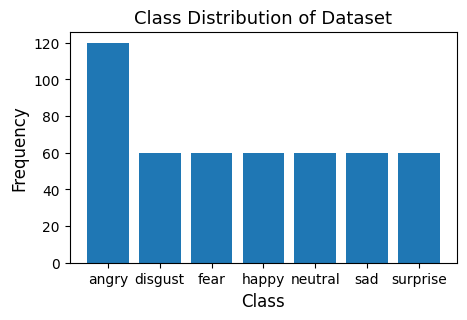

In [61]:
data_distribution(SAVEE_df)

In [62]:
# TESS -----------------------------------------------------------------------

os.chdir(DATASETS_FOLDER)

path = []
emotions = []
dataset_size = 0
dir_list = os.listdir(TESS)

for i in dir_list:
    fname = os.listdir(TESS + i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotions.append('angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotions.append('disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotions.append('fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotions.append('happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotions.append('neutral')
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotions.append('surprise')
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotions.append('sad')
        else:
            emotions.append('unknown')
        file_name = TESS + i + "/" + f
        path.append(file_name)
        file_stats = os.stat(file_name)
        dataset_size += file_stats.st_size

TESS_df = pd.DataFrame(emotions, columns = ['emotions'])
TESS_df['labels'] = TESS_df.replace({'neutral':0, 'happy':1, 'sad':2, 'angry':3, 'fear':4, 'disgust':5, 'surprise':6})
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)

DATAFRAME = TESS_df
DATASET_n = 'D.TESS_'
VERSION_n = 'V.6EpN_'
NAME_BASE = DATASET_n + VERSION_n
TEST_DF = NAME_BASE + 'test_DF.p'
tess_train_df, tess_test_df =  data_split(dataset=DATAFRAME, name_dump=TEST_DF)

print(TESS_df.emotions.value_counts())
print()
print(TESS_df)
print("Dataset size: ",dataset_size/1024/1024)

emotions
angry       400
surprise    400
happy       400
fear        400
disgust     400
neutral     400
sad         400
Name: count, dtype: int64

     emotions  labels source  \
0       angry       3   TESS   
1       angry       3   TESS   
2       angry       3   TESS   
3       angry       3   TESS   
4       angry       3   TESS   
...       ...     ...    ...   
2795  neutral       0   TESS   
2796  neutral       0   TESS   
2797  neutral       0   TESS   
2798  neutral       0   TESS   
2799  neutral       0   TESS   

                                                   path  
0     ./TESS Toronto emotional speech set data/OAF_a...  
1     ./TESS Toronto emotional speech set data/OAF_a...  
2     ./TESS Toronto emotional speech set data/OAF_a...  
3     ./TESS Toronto emotional speech set data/OAF_a...  
4     ./TESS Toronto emotional speech set data/OAF_a...  
...                                                 ...  
2795  ./TESS Toronto emotional speech set data/OAF_n...  
279

/tmp/ipykernel_3348897/913464768.py:35: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  TESS_df['labels'] = TESS_df.replace({'neutral':0, 'happy':1, 'sad':2, 'angry':3, 'fear':4, 'disgust':5, 'surprise':6})


Content
CREMA-D is a data set of 7,442 original clips from 91 actors. These clips were from 48 male and 43 female actors between the ages of 20 and 74 coming from a variety of races and ethnicities (African America, Asian, Caucasian, Hispanic, and Unspecified). Actors spoke from a selection of 12 sentences. The sentences were presented using one of six different emotions (Anger, Disgust, Fear, Happy, Neutral, and Sad) and four different emotions levels (Low, Medium, High, and Unspecified).  

Many audio datasets use a limited number of speakers which leads to a lot of information leakage. CREMA-D has many speakers. For this fact, the CREMA-D is a very good dataset to use to ensure the model does not overfit.

In [63]:
# CREMA Dataframe

os.chdir(DATASETS_FOLDER)

crema_directory_list = os.listdir(CREMA)
emotions = []
path = []
dataset_size=0
for file in crema_directory_list:
    # storing file paths
    #path.append(CREMA + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        emotions.append('sad')
    elif part[2] == 'ANG':
        emotions.append('angry')
    elif part[2] == 'DIS':
        emotions.append('disgust')
    elif part[2] == 'FEA':
        emotions.append('fear')
    elif part[2] == 'HAP':
        emotions.append('happy')
    elif part[2] == 'NEU':
        emotions.append('neutral')
    else:
        emotions.append('Unknown')
    file_name = CREMA + file
    path.append(file_name)
    file_stats = os.stat(file_name)
    dataset_size += file_stats.st_size

CREMA_df = pd.DataFrame(emotions, columns = ['emotions'])
CREMA_df['labels'] = CREMA_df.replace({'neutral':0, 'happy':1, 'sad':2, 'angry':3, 'fear':4, 'disgust':5, 'surprise':6})
CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(path, columns = ['path'])],axis=1)

DATAFRAME = CREMA_df
DATASET_n = 'D.CREMA_'
VERSION_n = 'V.6EpN_'
NAME_BASE = DATASET_n + VERSION_n
TEST_DF = NAME_BASE + 'test_DF.p'
crema_train_df, crema_test_df =  data_split(dataset=DATAFRAME, name_dump=TEST_DF)

print(CREMA_df.emotions.value_counts())
print()
print(CREMA_df)
print("Dataset size: ",dataset_size/1024/1024)

emotions
fear       1271
sad        1271
happy      1271
disgust    1271
angry      1271
neutral    1087
Name: count, dtype: int64

     emotions  labels source                                   path
0        fear       4  CREMA  ./cremad/AudioWAV/1032_TIE_FEA_XX.wav
1        fear       4  CREMA  ./cremad/AudioWAV/1053_IEO_FEA_MD.wav
2     neutral       0  CREMA  ./cremad/AudioWAV/1062_TIE_NEU_XX.wav
3        fear       4  CREMA  ./cremad/AudioWAV/1014_TIE_FEA_XX.wav
4         sad       2  CREMA  ./cremad/AudioWAV/1064_WSI_SAD_XX.wav
...       ...     ...    ...                                    ...
7437      sad       2  CREMA  ./cremad/AudioWAV/1049_WSI_SAD_XX.wav
7438    happy       1  CREMA  ./cremad/AudioWAV/1067_DFA_HAP_XX.wav
7439  neutral       0  CREMA  ./cremad/AudioWAV/1021_TIE_NEU_XX.wav
7440  neutral       0  CREMA  ./cremad/AudioWAV/1068_IWL_NEU_XX.wav
7441  disgust       5  CREMA  ./cremad/AudioWAV/1050_ITH_DIS_XX.wav

[7442 rows x 4 columns]
Dataset size:  577.83120727

/tmp/ipykernel_3348897/2135516394.py:34: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  CREMA_df['labels'] = CREMA_df.replace({'neutral':0, 'happy':1, 'sad':2, 'angry':3, 'fear':4, 'disgust':5, 'surprise':6})


In [64]:
# RAVDESS --------------------------------------------------------------------
os.chdir(DATASETS_FOLDER)

dir_list = os.listdir(RAV)
dir_list.sort()

emotions = []
gender = []
dataset_size=0
path = []
for i in dir_list:
    fname = os.listdir(RAV + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotions.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        file_name = RAV + i + '/' + f
        path.append(file_name)
        file_stats = os.stat(file_name)
        dataset_size += file_stats.st_size

RAV_df_emotions = pd.DataFrame(emotions)
RAV_df = RAV_df_emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad',
                              5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),
                    RAV_df,
                    RAV_df_emotions.replace({1:0, #'neutral':0
                                            2:7, #'calm':7
                                            3:1, #'happy':1
                                            4:2, #'sad':2
                                            5:3, #'angry':3
                                            6:4, #'fear':4
                                            7:5, #'disgust':5
                                            8:6})],axis=1) #'surprise':6

RAV_df.columns = ['gender','emotions','labels']
RAV_df['source'] = 'RAVDESS'
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)

DATAFRAME = RAV_df
DATASET_n = 'D.RAV_'
VERSION_n = 'V.7EpN_'
NAME_BASE = DATASET_n + VERSION_n
TEST_DF = NAME_BASE + 'test_DF.p'
rav_train_df, rav_test_df =  data_split(dataset=DATAFRAME, name_dump=TEST_DF)

print(RAV_df.emotions.value_counts())
print()
print(RAV_df)
print("Dataset size: ",dataset_size/1024/1024)

RavMales_df = RAV_df[RAV_df["gender"]=="male"].drop('gender', axis=1)
RavFemales_df = RAV_df[RAV_df["gender"]=="female"].drop('gender', axis=1)

emotions
sad         192
fear        192
angry       192
happy       192
disgust     192
calm        192
surprise    192
neutral      96
Name: count, dtype: int64

      gender  emotions  labels   source  \
0       male       sad       2  RAVDESS   
1       male      fear       4  RAVDESS   
2       male       sad       2  RAVDESS   
3       male     angry       3  RAVDESS   
4       male     happy       1  RAVDESS   
...      ...       ...     ...      ...   
1435  female   disgust       5  RAVDESS   
1436  female      fear       4  RAVDESS   
1437  female       sad       2  RAVDESS   
1438  female      fear       4  RAVDESS   
1439  female  surprise       6  RAVDESS   

                                                   path  
0     ./ravdess-emotional-speech-audio/audio_speech_...  
1     ./ravdess-emotional-speech-audio/audio_speech_...  
2     ./ravdess-emotional-speech-audio/audio_speech_...  
3     ./ravdess-emotional-speech-audio/audio_speech_...  
4     ./ravdess-emotional-spe

In [65]:
Females_df = pd.concat([TESS_df,RavFemales_df])#,axis=0)
Females_df.reset_index(inplace=True,drop=True)
Females_df = Females_df.replace({'calm':'neutral'})
Females_df = Females_df.replace({7:0})
print(Females_df.emotions.value_counts())
print()
print(Females_df)

emotions
neutral     544
surprise    496
angry       496
happy       496
fear        496
disgust     496
sad         496
Name: count, dtype: int64

      emotions  labels   source  \
0        angry       3     TESS   
1        angry       3     TESS   
2        angry       3     TESS   
3        angry       3     TESS   
4        angry       3     TESS   
...        ...     ...      ...   
3515   disgust       5  RAVDESS   
3516      fear       4  RAVDESS   
3517       sad       2  RAVDESS   
3518      fear       4  RAVDESS   
3519  surprise       6  RAVDESS   

                                                   path  
0     ./TESS Toronto emotional speech set data/OAF_a...  
1     ./TESS Toronto emotional speech set data/OAF_a...  
2     ./TESS Toronto emotional speech set data/OAF_a...  
3     ./TESS Toronto emotional speech set data/OAF_a...  
4     ./TESS Toronto emotional speech set data/OAF_a...  
...                                                 ...  
3515  ./ravdess-emotional

In [66]:
Males_df = pd.concat([SAVEE_df,RavMales_df])#,axis=0)
Males_df.reset_index(inplace=True,drop=True)
Males_df = Males_df.replace({'calm':'neutral'})
Males_df = Males_df.replace({7:0})
print(Males_df.emotions.value_counts())
print()
print(Males_df)

emotions
neutral     264
angry       156
fear        156
disgust     156
sad         156
happy       156
surprise    156
Name: count, dtype: int64

     emotions  labels   source  \
0     neutral       0    SAVEE   
1     neutral       0    SAVEE   
2       angry       3    SAVEE   
3       angry       3    SAVEE   
4        fear       4    SAVEE   
...       ...     ...      ...   
1195  neutral       0  RAVDESS   
1196  disgust       5  RAVDESS   
1197  disgust       5  RAVDESS   
1198     fear       4  RAVDESS   
1199  neutral       0  RAVDESS   

                                                   path  
0     ./surrey-audiovisual-expressed-emotion-savee/A...  
1     ./surrey-audiovisual-expressed-emotion-savee/A...  
2     ./surrey-audiovisual-expressed-emotion-savee/A...  
3     ./surrey-audiovisual-expressed-emotion-savee/A...  
4     ./surrey-audiovisual-expressed-emotion-savee/A...  
...                                                 ...  
1195  ./ravdess-emotional-speech-audi

# 2: SER HuBert Cross corpus several experiments

Visualise the training loss and accuracy.

In [ ]:

ROOT_PRJ =   '/media/beegfs/home/x002/PROJECT/'
MODELS_FOLDER = '/media/beegfs/home/x002/SCRATCH/models'

MNAME = '20250407133603.CAFE_CREMA_EMOFILM_RAVDESS_TESS.hubert-large-ll60k.model'
MLOG  = '20250407133603.CAFE_CREMA_EMOFILM_RAVDESS_TESS.hubert-large-ll60k_log.p'
STATE = 'Train_State.p
STATEDIR = 'dump/experim.20250407133603.776883.indep/'
tms,epoch_ini,best_acc,lr,wd = pickle.load(open(ROOT_PRJ+STATEDIR+'Train_State.p', 'rb'))
val_acc, val_loss = pickle.load(open(ROOT_PRJ+STATEDIR+MLOG, 'rb'))

plot_loss(val_loss)
plot_acc(val_acc)

In [ ]:




model, epoch, optim, train_loss, train_accuracies = load_checkpoint(device, model, optim, MODEL_NAME, dump_folder=DUMP_FOLDER)

model.to(device)
record = testing(test_dataset, model)
os.chdir(DUMP_FOLDER)
pickle.dump(record, open(RECORD, 'wb'))

Check the result.

df_record = incorrect_ones(record,test_df)

print(test_df.emotions.value_counts())

Display the Confusion Matrix of the result.

display_confusion_matrix(df_record)

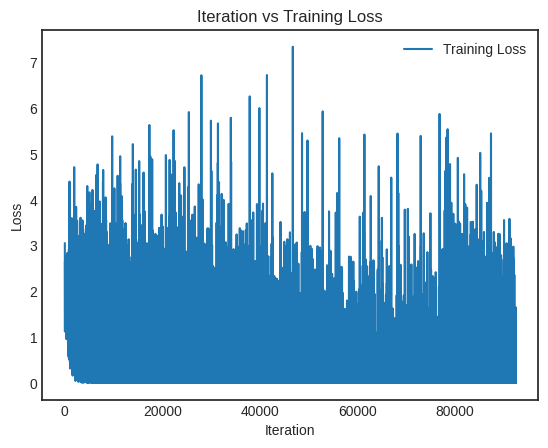

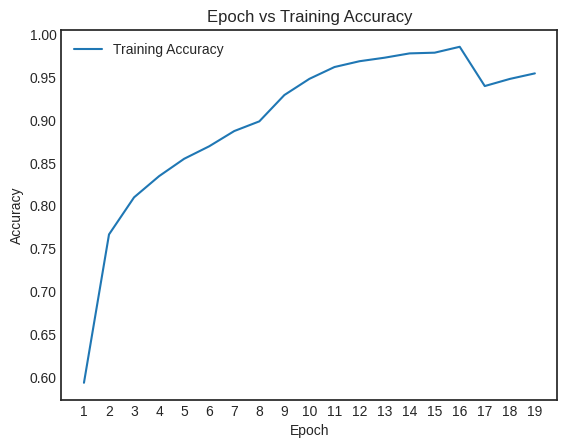

In [ ]:
plot_loss_acc(train_loss, train_accuracies)

###Testing

Test the model.

In [ ]:
model, epoch, optim, train_loss, train_accuracies = load_checkpoint(device, model, optim, MODEL_NAME, dump_folder=DUMP_FOLDER)

In [ ]:
model.to(device)
record = testing(test_dataset, model)
os.chdir(DUMP_FOLDER)
pickle.dump(record, open(RECORD, 'wb'))

100%|██████████| 2428/2428 [01:05<00:00, 37.09it/s, loss=0.009, accuracy=0.866]


The final accuracy on the test dataset: 86.6145%


ops , lo mismo no he asegurado la distribución equilibrada entre datasets, aunque si entre etiquetas... podría hacer divisiones train test desde el principio  para cada datasety luego ensamblarlas...


In [ ]:
test_df = pickle.load(open(TEST_DF, 'rb'))

FileNotFoundError: [Errno 2] No such file or directory: 'M.HubertLarge_D.Cross1_V.6EpN_test_DF.p'

Check the result.

In [ ]:
df_record = incorrect_ones(record,test_df)

     emotions  labels  Model Prediction
7         ang       3                 1
15        dis       5                 4
26        fea       4                 6
28        fea       4                 1
34        fea       4                 6
35        fea       4                 2
46        hap       1                 3
47        hap       1                 6
81        sad       2                 0
90        sur       6                 1
682       ang       3                 6
736       dis       5                 2
754       dis       5                 3
777       fea       4                 2
782       fea       4                 1
786       fea       4                 2
794       fea       4                 2
822       hap       1                 2
836       hap       1                 5
842       hap       1                 2
871       sad       2                 4
892       sad       2                 0
897       sad       2                 0
898       sad       2                 0


In [ ]:
print(test_df.emotions.value_counts())

emotions
angry       384
disgust     384
fear        384
happy       384
sad         384
neutral     378
surprise    130
Name: count, dtype: int64


Display the Confusion Matrix of the result.

Confusion matrix of the result: 


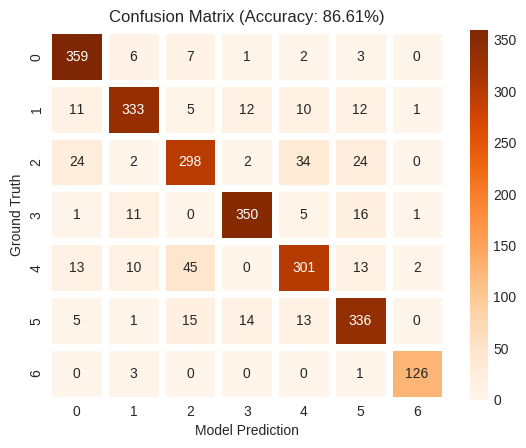

In [ ]:
display_confusion_matrix(df_record)

.....

In [ ]:
model.to(device)
record = testing(test_dataset, model)
os.chdir(DUMP_FOLDER)
pickle.dump(record, open(RECORD, 'wb'))

Check the result.

In [ ]:
df_record = incorrect_ones(record,test_df)

In [ ]:
print(test_df.emotions.value_counts())

Display the Confusion Matrix of the result.

In [ ]:
display_confusion_matrix(df_record)

## Testing

In [ ]:
model, epoch, optim, train_loss, train_accuracies = load_checkpoint(device, model, optim, MODEL_NAME, dump_folder=DUMP_FOLDER)

In [ ]:
model.to(device)
record = testing(test_dataset, model)
os.chdir(DUMP_FOLDER)
pickle.dump(record, open(RECORD, 'wb'))

Check the result.

In [ ]:
df_record = incorrect_ones(record,test_df)

In [ ]:
print(test_df.emotions.value_counts())

Display the Confusion Matrix of the result.

In [ ]:
display_confusion_matrix(df_record)

# 99: Record audio from your microphone in Colab

Maily comes from "Noé Tits - Numediart (UMONS) - [noetits.com](https://noetits.com)" Noé also leaarned the part to record from microphone from [here](https://colab.research.google.com/gist/ricardodeazambuja/03ac98c31e87caf284f7b06286ebf7fd/microphone-to-numpy-array-from-your-browser-in-colab.ipynb)

In [ ]:
# Preparar entorno en google drive. Si se ejecuta en local u en otro entorno
# habría que modificar esta celda
from google.colab import drive
import os
Project_folder = '/content/drive/MyDrive/Colab Notebooks/TFM_2023_24_MuIA/Transformer.1_202402/'
# Si se ejecutase de nuevo todo, sin desconectar el entorno, drive.mount() a
# veces da problemas. Con try/except solo se mota drive la primera vez y no lo
# vuelve a hacer cuando ya se ha montado

try:
  os.chdir(Project_folder)
except:
  drive.mount('/content/drive', force_remount=True)
  os.chdir(Project_folder)
else:
  print("Drive ya está montado")
  print(os.getcwd())

In [ ]:
!apt -y -qq install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg  -q -qq

In [ ]:
!pip install pyaudio -qq -q

In [ ]:
!pip install wave -qq -q

In [ ]:
!pip install ffmpeg-python -qq -q

In [ ]:
"""
To write this piece of code I took inspiration/code from a lot of places.
It was late night, so I'm not sure how much I created or just copied o.O
Here are some of the possible references:
https://blog.addpipe.com/recording-audio-in-the-browser-using-pure-html5-and-minimal-javascript/
https://stackoverflow.com/a/18650249
https://hacks.mozilla.org/2014/06/easy-audio-capture-with-the-mediarecorder-api/
https://air.ghost.io/recording-to-an-audio-file-using-html5-and-js/
https://stackoverflow.com/a/49019356
"""
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
from scipy.io.wavfile import read as wav_read
import io
import ffmpeg

AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");

my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data);
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);


function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!"
  }
}

// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())

});

}
});

</script>
"""

def get_audio():
  display(HTML(AUDIO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])

  process = (ffmpeg
    .input('pipe:0')
    .output('pipe:1', format='wav')
    .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
  )
  output, err = process.communicate(input=binary)

  riff_chunk_size = len(output) - 8
  # Break up the chunk size into four bytes, held in b.
  q = riff_chunk_size
  b = []
  for i in range(4):
      q, r = divmod(q, 256)
      b.append(r)

  # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
  riff = output[:4] + bytes(b) + output[8:]

  sr, audio = wav_read(io.BytesIO(riff))

  return audio, sr

In [ ]:
audio, sr = get_audio()

In [ ]:
import scipy
scipy.io.wavfile.write('recording.wav', sr, audio)

In [ ]:
!pip install pyaudio

In [ ]:
import pyaudio
import wave

CHUNK = 1024
FORMAT = pyaudio.paInt16 #paInt8
CHANNELS = 2
RATE = 44100 #sample rate
RECORD_SECONDS = 4
WAVE_OUTPUT_FILENAME = "output10.wav"
